## Default runtime is CPU
## Runtime-> Change runtime type to use GPU in colab
gpu will improve the query performance, but may hurt the cachetable performance(cache table computing is using cpu(numpy array))

replace ua_detrac.mp4 with proper camera trap videos if you want to test this Deep Learning Classification Model(AnimalDetectorPlus)

In [ ]:
import os.path
EVA_PATH = '/content/eva'
if os.path.exists(EVA_PATH):
  print('please skip cell 1, because evadb is already installed in this server')
else:
  print('please run cell 1 to install evadb')

please skip cell 1, because evadb is already installed in this server


In [ ]:
!git clone https://github.com/sashiko-345/eva.git
%cd eva
!pip install --upgrade pip
!sudo -E apt install -y openjdk-11-jdk openjdk-11-jre 
!sh script/antlr4/generate_parser.sh 
!pip install -e ".[dev]"

fatal: destination path 'eva' already exists and is not an empty directory.
/content/eva
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.17+8-1ubuntu2~18.04).
openjdk-11-jre is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
--2022-12-05 02:28:33--  https://www.antlr.org/download/antlr-4.10.1-complete.jar
Resolving www.antlr.org (www.antlr.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.antlr.org (www.antlr.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3466412 (3.3M) [application/java-archive]
Saving to: 

In [ ]:
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb

File ‘00-start-eva-server.ipynb’ already there; not retrieving.

[  -z "$(lsof -ti:5432)" ] || kill -9 "$(lsof -ti:5432)"
nohup eva_server > eva.log 2>&1 &



In [ ]:
!wget -nc "https://raw.githubusercontent.com/sashiko-345/eva/master/dog.jpg"
!wget -nc https://www.dropbox.com/s/k00wge9exwkfxz6/ua_detrac.mp4
!wget "https://raw.githubusercontent.com/sashiko-345/eva/master/eva/udfs/camera_trap_animal_detector.py" 
!mv 'camera_trap_animal_detector.py' 'downloaded_camera_trap_animal_detector.py'

!pip install timm

File ‘dog.jpg’ already there; not retrieving.

File ‘ua_detrac.mp4’ already there; not retrieving.

--2022-12-05 02:28:59--  https://raw.githubusercontent.com/sashiko-345/eva/master/eva/udfs/camera_trap_animal_detector.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14096 (14K) [text/plain]
Saving to: ‘camera_trap_animal_detector.py’

camera_trap_animal_ 100%[===================>]  13.77K  --.-KB/s    in 0.001s  

2022-12-05 02:28:59 (17.1 MB/s) - ‘camera_trap_animal_detector.py’ saved [14096/14096]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# first run "eva_server" in terminal with you python venv(i.e. test_eva_db you just created)

# run this ipynb under the same python venv as that of server

# connect to server
from eva.server.db_api import connect
import nest_asyncio
nest_asyncio.apply()
connection = connect(host = '127.0.0.1', port = 5435)
cursor = connection.cursor()

In [ ]:
# this car video is not camera trap animal videos
# replace it with proper one!
cursor.execute('LOAD FILE "ua_detrac.mp4" INTO singleVid;')
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  Video successfully added at location: ua_detra...
@batch_size: 1
@identifier_column: None
@query_time: 0.04973934199995256


In [ ]:
drop_udf_query = """DROP UDF AnimalDetectorPlus;
        """
cursor.execute(drop_udf_query)
response = cursor.fetch_all()
print(response)

udf_path = 'downloaded_camera_trap_animal_detector.py'
create_udf_query = f"""CREATE UDF IF NOT EXISTS AnimalDetectorPlus
                  INPUT  (frame NDARRAY UINT8(3, ANYDIM, ANYDIM))
                  OUTPUT (labels NDARRAY STR(ANYDIM),
                          scores NDARRAY FLOAT32(ANYDIM))
                  TYPE  Classification
                  IMPL  '{udf_path}';
        """
# load
cursor.execute(create_udf_query)
response = cursor.fetch_all()
print(response)

@status: 0
@batch: Batch Object:
@dataframe:                                              0
0  UDF AnimalDetectorPlus successfully dropped
@batch_size: 1
@identifier_column: None
@query_time: 0.028343275999986872
@status: 0
@batch: Batch Object:
@dataframe:                                                    0
0  UDF AnimalDetectorPlus successfully added to t...
@batch_size: 1
@identifier_column: None
@query_time: 6.017906794000055


In [ ]:
!pip install psutil
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psutil
import GPUtil
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
import matplotlib

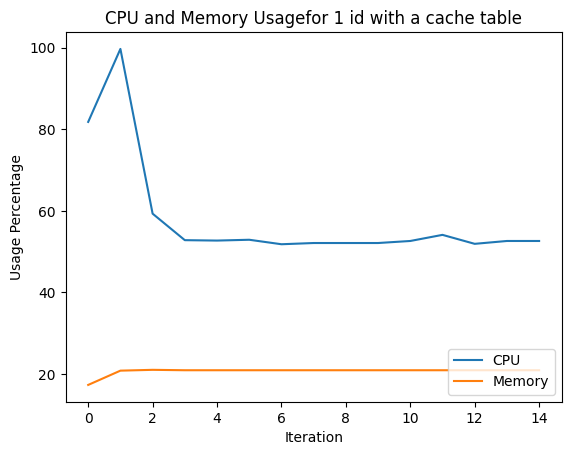

In [ ]:
# Creating an almost infinite for loop to monitor the details continuously
%matplotlib inline
cpu_usage_list = []
memory_lsit = []
iteration_list = []

# set time it to 0
iteration = 0
for i in range(15):
    # Obtaining all the essential details
    # time it and store it in a list
    iteration_list.append(iteration)
    cpu_usage_list.append(psutil.cpu_percent())
    memory_lsit.append(psutil.virtual_memory().percent)
    
    cursor.execute('''SELECT id, AnimalDetectorPlus(data) FROM singleVid WHERE id < 1''')
    response = cursor.fetch_all()
    iteration += 1
# plot the graph
plt.plot(iteration_list, cpu_usage_list, label = "CPU")
plt.plot(iteration_list, memory_lsit, label = "Memory")
plt.xlabel('Iteration')
plt.ylabel('Usage Percentage')
plt.title('CPU and Memory Usagefor 1 id with a cache table')
plt.legend(loc ="lower right")
plt.show()

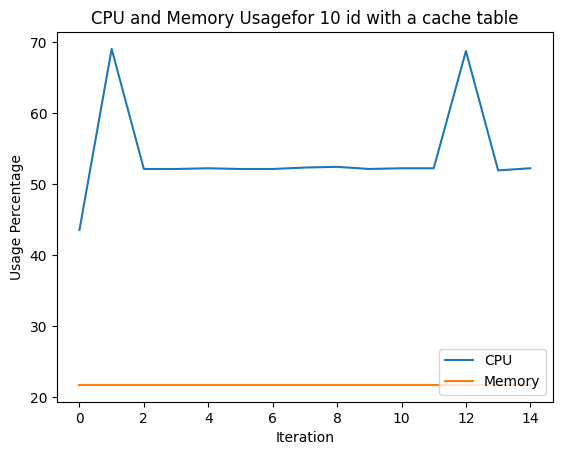

In [ ]:
# Creating an almost infinite for loop to monitor the details continuously
%matplotlib inline
cpu_usage_list = []
memory_lsit = []
iteration_list = []

# set time it to 0
iteration = 0
for i in range(15):
    # Obtaining all the essential details
    # time it and store it in a list
    iteration_list.append(iteration)
    cpu_usage_list.append(psutil.cpu_percent())
    memory_lsit.append(psutil.virtual_memory().percent)
    
    cursor.execute('''SELECT id, AnimalDetectorPlus(data) FROM singleVid WHERE id < 10''')
    response = cursor.fetch_all()
    iteration += 1
# plot the graph
plt.plot(iteration_list, cpu_usage_list, label = "CPU")
plt.plot(iteration_list, memory_lsit, label = "Memory")
plt.xlabel('Iteration')
plt.ylabel('Usage Percentage')
plt.title('CPU and Memory Usagefor 10 id with a cache table')
plt.legend(loc ="lower right")
plt.show()

In [ ]:
# query dog with animal detector
cursor.execute('''SELECT id, AnimalDetectorPlus(data) FROM singleVid WHERE id < 10''')
response = cursor.fetch_all()
print(response)
# where id does not work for uploaded picture, only work for videos

@status: 0
@batch: Batch Object:
@dataframe:     singlevid.id  animaldetectorplus.labels     animaldetectorplus.scores
0              0                    [blank]          [0.7566820979000001]
1              1                    [blank]                [0.7419732213]
2              2                    [blank]                 [0.686293602]
3              3                    [blank]                [0.6848589182]
4              4                         []                            []
5              5                         []                            []
6              6                         []                            []
7              7  [blank, monkey_prosimian]  [0.5148901939, 0.5350939035]
8              8                    [blank]          [0.5157492757000001]
9              9                    [blank]                [0.5370559096]
10             0                    [blank]          [0.7566820979000001]
11             1                    [blank]                [0.74197

In [ ]:
# query dog with animal detector
cursor.execute('''SELECT id, AnimalDetectorPlus(data) FROM singleVid WHERE id < 10''')
response = cursor.fetch_all()
print(response)
# where id does not work for uploaded picture, only work for videos

@status: 0
@batch: Batch Object:
@dataframe:     singlevid.id  animaldetectorplus.labels     animaldetectorplus.scores
0              0                    [blank]          [0.7566820979000001]
1              1                    [blank]                [0.7419732213]
2              2                    [blank]                 [0.686293602]
3              3                    [blank]                [0.6848589182]
4              4                         []                            []
5              5                         []                            []
6              6                         []                            []
7              7  [blank, monkey_prosimian]  [0.5148901939, 0.5350939035]
8              8                    [blank]          [0.5157492757000001]
9              9                    [blank]                [0.5370559096]
10             0                    [blank]          [0.7566820979000001]
11             1                    [blank]                [0.74197